# A Particle Neural Network Toy Model for Jet Classification

Below are the import statements, as well as some self-built code modulas.

In [1]:
from MakeData import MakeData
from ParticleNet import ParticleNet
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from mpl_toolkits import mplot3d
import neural_structured_learning as nsl
from collections import defaultdict

The user decides the constant momentum used for this simulation for all particles, as well as the size of the training and testing data sets.  The actual size of the test and training data sets is doubled as these numbers are for each distribution. 

In [2]:
p = 100
Ntrain = 1000
Ntest = 1000

Here, I create the simulation data of a million particles per distribution for the training and testing data sets.

In [3]:
train,train_vals = MakeData(p,Ntrain)
test,test_vals = MakeData(p,Ntest)

Below is a 3D plot of the momentum of each particle.  Notice how all particles have constant total momentum but random direction, resulting in the data points filling out the surface of a sphere.

No handles with labels found to put in legend.


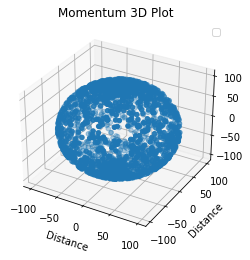

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(train[:,0], train[:,1], train[:,2]);
plt.title('Momentum 3D Plot')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.legend()

Below is a plot of the mass distributions for the training data set.  One expodential, one guassian.

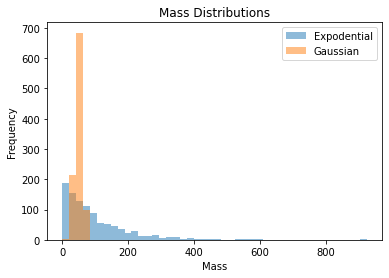

In [5]:
n,bins,weights = plt.hist(train[train_vals==0,3], bins = 'auto', alpha = 0.5, label = 'Expodential')
plt.hist(train[train_vals==1,3], bins = bins, alpha = 0.5, label = 'Gaussian')
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.title('Mass Distributions')
plt.legend()

Here is a plot of Tau, the measure of N-subjettiness which is different for each mass distribution, and represented by a expodential distribution.

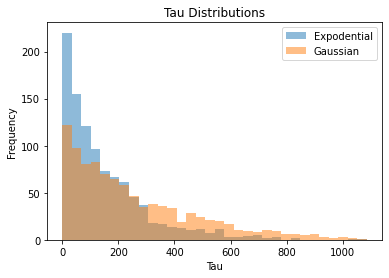

In [6]:
n,bins,weights = plt.hist(train[train_vals==0,4], bins = 'auto', alpha = 0.5, label = 'Expodential')
plt.hist(train[train_vals==1,4], bins = bins, alpha = 0.5,label = 'Gaussian')
plt.title('Tau Distributions')
plt.xlabel('Tau')
plt.ylabel('Frequency')
plt.legend()

Here, I show that the simulation data is shuffled before being fed into the neural networks.  This vector is of the true classifications of each particle, where 0 represents an expodential distribution and 1 a gaussian distribution.

In [7]:
print(test_vals[0:20])

[1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.]


This line of code runs an ordinary neural network model.  The predictions for the test data set are returned.  These predictions are the probability guesses of the neural network for the test data set.  For each particle, the neural network will return a probability for each classification, two numbers in this case, one for the probability that particle is a 0, and another the probability this particle is a 1, representing expodential vs gaussian respectivly.

In [8]:
predictions = ParticleNet(train,train_vals,test,10)

Epoch 1/10
63/63 [==============================] - 0s 606us/step - loss: 5.8027 - accuracy: 0.5754
Epoch 2/10
63/63 [==============================] - 0s 582us/step - loss: 0.8507 - accuracy: 0.6260
Epoch 3/10
63/63 [==============================] - 0s 588us/step - loss: 0.7073 - accuracy: 0.6715
Epoch 4/10
63/63 [==============================] - 0s 572us/step - loss: 0.5991 - accuracy: 0.6991
Epoch 5/10
63/63 [==============================] - 0s 597us/step - loss: 0.5780 - accuracy: 0.7168
Epoch 6/10
63/63 [==============================] - 0s 606us/step - loss: 0.5890 - accuracy: 0.7349
Epoch 7/10
63/63 [==============================] - 0s 684us/step - loss: 0.5385 - accuracy: 0.7595
Epoch 8/10
63/63 [==============================] - 0s 672us/step - loss: 0.5282 - accuracy: 0.7533
Epoch 9/10
63/63 [==============================] - 0s 599us/step - loss: 0.4811 - accuracy: 0.7600
Epoch 10/10
63/63 [==============================] - 0s 500us/step - loss: 0.4033 - accuracy: 0.8140

Here are the results of this ordinary neural network.  Accuracy is between 74% and 82% and the expodential data particles had a higher chance of being correctly classified than the guassian particles.

In [9]:
FalseExps = sum(predictions[np.where(test_vals == 0)])/Ntest*100
print("The model, on average, thought a Expodential distribution to be just that at " + str(FalseExps[0]) + " percent.")
print("And thought a Expodential distribution to be a Gaussian distribution at " + str(FalseExps[1]) + " percent.")
print("")
FalseGauss = sum(predictions[np.where(test_vals == 1)])/Ntest*100
print("The model, on average, thought a Gaussian distribution to be just that at " + str(FalseGauss[1]) + " percent.")
print("And thought a Gaussian distribution to be a Expodential distribution at " + str(FalseGauss[0]) + " percent.")

The model, on average, thought a Expodential distribution to be just that at 72.3272 percent.
And thought a Expodential distribution to be a Gaussian distribution at 27.672836 percent.

The model, on average, thought a Gaussian distribution to be just that at 74.75356 percent.
And thought a Gaussian distribution to be a Expodential distribution at 25.24636 percent.


# Base Model

This is the base model for the Adversarial Neural network, a completely different model then the one above.

In [10]:
def build_base_model():
    '''Builds the Basic Model'''
    input_shape = (1,1)
    inputs = [tf.keras.Input(shape=input_shape, dtype=tf.float32, name=name) for name in FEATURE_INPUT_NAME]
#    inputs = tf.keras.Input(shape=(5,))
    print(inputs)
    
    x = tf.keras.layers.concatenate(inputs = [*inputs], axis=-1, name = 'concat')

    
    print(x)
    
    x = tf.keras.layers.Conv1D(64, 3, padding = 'same', activation='relu', name = 'conv1')(x)
    x = tf.keras.layers.Conv1D(64, 1, padding = 'same', activation='relu', name = 'conv2')(x)
#    x = tf.keras.layers.MaxPool1D(2)(x)
    x = tf.keras.layers.Conv1D(32, 3, padding = 'same', activation='relu', name = 'conv3')(x)
    x = tf.keras.layers.Conv1D(32, 1, padding = 'same', activation='relu', name = 'conv4')(x)
#    x = tf.keras.layers.MaxPool1D(2)(x)
    x = tf.keras.layers.Flatten(name = 'flatten')(x)
    x = tf.keras.layers.Dense(64, activation='relu', name = 'relu')(x)
    pred = tf.keras.layers.Dense(2, activation='softmax', name = 'output')(x) 
    model = tf.keras.Model(inputs=[*inputs], outputs=pred)

    return model

Below the base model is built and a summary of its layers are printed out.

In [11]:
FEATURE_INPUT_NAME = ['Px','Py','Pz','Mass','Tau']
base_model = build_base_model()
base_model.summary()

[<KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Px')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Py')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Pz')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Mass')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Tau')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 5), dtype=tf.float32, name=None), name='concat/concat:0', description="created by layer 'concat'")
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Px (InputLayer)                 [(None, 1, 1)]       0                                            
__________________________________________________________________________________________________
Py (InputLayer)                 [(None, 1, 1)]       0                  

Here, I train the base model with the same training data set used above.

In [12]:
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])

base_model.fit((train[:,0],train[:,1],train[:,2],train[:,3],train[:,4]),train_vals, epochs=10)

Epoch 1/10
63/63 [==============================] - 0s 1ms/step - loss: 0.6352 - acc: 0.6157
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4958 - acc: 0.7663
Epoch 3/10
63/63 [==============================] - 0s 982us/step - loss: 0.3847 - acc: 0.8323
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3640 - acc: 0.8367
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3935 - acc: 0.8181
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3767 - acc: 0.8294
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3651 - acc: 0.8340
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3431 - acc: 0.8554
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3306 - acc: 0.8507
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3171 - acc: 0.8554


# Adversarial Model

Now, the adversarial model is outlined.

In [13]:
base_adv_model = build_base_model()
adv_model = nsl.keras.AdversarialRegularization(
    base_adv_model,
    label_keys = ['labels']
)

[<KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Px')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Py')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Pz')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Mass')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Tau')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 5), dtype=tf.float32, name=None), name='concat/concat:0', description="created by layer 'concat'")


Here, I am just reformating the training and testing data sets such that they can be input into the adversarial model.

In [14]:
trainAdv = {
    'Px': train[:,0],
    'Py': train[:,1],
    'Pz': train[:,2],
    'Mass': train[:,3],
    'Tau': train[:,4],
    'labels': train_vals
}

testAdv = {
    'Px': test[:,0],
    'Py': test[:,1],
    'Pz': test[:,2],
    'Mass': test[:,3],
    'Tau': test[:,4],
    'labels': test_vals
}

Here, I compile the adversarial model.

In [15]:
adv_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])

And here, I fit the adversarial model to the training data set.

In [16]:
adv_model.fit(trainAdv, epochs=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - 6s 2ms/step - loss: 0.7607 - sparse_categorical_crossentropy: 0.6339 - sparse_categorical_accuracy: 0.6325 - scaled_adversarial_loss: 0.1268


This is the summary of the Adversarial Regularization model.

In [17]:
adv_model.summary()

Model: "AdversarialRegularization"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 2)                 14658     
Total params: 14,658
Trainable params: 14,658
Non-trainable params: 0
_________________________________________________________________


Below, the accuracy of the Adversarial model on the test data set is evaulated.

In [18]:
results = adv_model.evaluate(testAdv)
named_results = dict(zip(adv_model.metrics_names, results))
print('\naccuracy:', named_results['sparse_categorical_accuracy'])

63/63 [==============================] - 0s 1ms/step - loss: 0.6486 - sparse_categorical_crossentropy: 0.5405 - sparse_categorical_accuracy: 0.7210 - scaled_adversarial_loss: 0.1081

accuracy: 0.7210000157356262


And here, the predictions for the adversarial model on the test data set are calculated.  Just as before, these predictions are the probability guesses of the neural network for the test data set.  For each particle, the neural network will return a probability for each classification, two numbers in this case, one for the probability that particle is a 0, and another the probability this particle is a 1, representing expodential vs gaussian respectivly.

In [19]:
predict = adv_model.predict(testAdv)

Here are the results of the adversarial neural network on the test data set.  Accuracy is between 77% and 81% and the expodential data particles had a higher chance of being correctly classified than the guassian particles.

In [20]:
FalseExps = sum(predict[np.where(test_vals == 0)])/Ntest*100
print("The model, on average, thought a Expodential distribution to be just that at " + str(FalseExps[0]) + " percent.")
print("And thought a Expodential distribution to be a Gaussian distribution at " + str(FalseExps[1]) + " percent.")
print("")
FalseGauss = sum(predict[np.where(test_vals == 1)])/Ntest*100
print("The model, on average, thought a Gaussian distribution to be just that at " + str(FalseGauss[1]) + " percent.")
print("And thought a Gaussian distribution to be a Expodential distribution at " + str(FalseGauss[0]) + " percent.")

The model, on average, thought a Expodential distribution to be just that at 58.09854 percent.
And thought a Expodential distribution to be a Gaussian distribution at 41.901447 percent.

The model, on average, thought a Gaussian distribution to be just that at 71.69943 percent.
And thought a Gaussian distribution to be a Expodential distribution at 28.300625 percent.


## Summary of Results

Below is a summary of the results from both neural networks.  Both have around the same accuracy for the test data set of between 74% and 82% accuracy.  However, the adversarial neural network has a smaller range of values for the correct predictions, a range spaning 3% between the two distributions being correctly predicted, as opposed to the normal neural network having a range of 7% accuracy between correctly predicting a expodential vs a guassian distribution.

In [21]:
FalseExps = sum(predictions[np.where(test_vals == 0)])/Ntest*100
print("Ordinary Neural Network:")
print("The model, on average, thought a Expodential distribution to be just that at " + str(FalseExps[0]) + " percent.")
print("And thought a Expodential distribution to be a Gaussian distribution at " + str(FalseExps[1]) + " percent.")
FalseGauss = sum(predictions[np.where(test_vals == 1)])/Ntest*100
print("The model, on average, thought a Gaussian distribution to be just that at " + str(FalseGauss[1]) + " percent.")
print("And thought a Gaussian distribution to be a Expodential distribution at " + str(FalseGauss[0]) + " percent.")
print("")
print("Advesarial Neural Network:")
FalseExps = sum(predict[np.where(test_vals == 0)])/Ntest*100
print("The model, on average, thought a Expodential distribution to be just that at " + str(FalseExps[0]) + " percent.")
print("And thought a Expodential distribution to be a Gaussian distribution at " + str(FalseExps[1]) + " percent.")
FalseGauss = sum(predict[np.where(test_vals == 1)])/Ntest*100
print("The model, on average, thought a Gaussian distribution to be just that at " + str(FalseGauss[1]) + " percent.")
print("And thought a Gaussian distribution to be a Expodential distribution at " + str(FalseGauss[0]) + " percent.")

Ordinary Neural Network:
The model, on average, thought a Expodential distribution to be just that at 72.3272 percent.
And thought a Expodential distribution to be a Gaussian distribution at 27.672836 percent.
The model, on average, thought a Gaussian distribution to be just that at 74.75356 percent.
And thought a Gaussian distribution to be a Expodential distribution at 25.24636 percent.

Advesarial Neural Network:
The model, on average, thought a Expodential distribution to be just that at 58.09854 percent.
And thought a Expodential distribution to be a Gaussian distribution at 41.901447 percent.
The model, on average, thought a Gaussian distribution to be just that at 71.69943 percent.
And thought a Gaussian distribution to be a Expodential distribution at 28.300625 percent.


(0.0, 200.0)

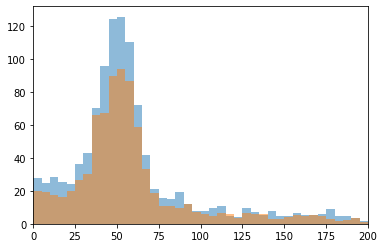

In [26]:
param = 3
dist = train[:,param]*predict[:,0]
plt.hist(x=train[:,param],weights=predict[:,1],alpha=0.5, bins=np.arange(0,1000,5))
plt.hist(x=train[:,param],weights=predict[:,0],alpha=0.5, bins=np.arange(0,1000,5))
plt.xlim(0,200)

In [23]:
adv_model.get_weights()

[array([[[ 9.94828343e-02, -5.88963479e-02,  7.32076168e-03,
          -2.36141384e-02, -1.83720887e-02, -7.35781416e-02,
          -8.11161473e-02,  1.04682356e-01, -9.99216735e-02,
           1.12172306e-01, -1.39839381e-01, -1.36186779e-02,
          -9.59275886e-02,  1.44124717e-01, -1.26920462e-01,
          -1.73970908e-02, -7.60310590e-02,  8.51043463e-02,
           1.64342105e-01, -1.53949365e-01,  5.20582497e-02,
          -6.36452436e-03,  1.05736166e-01, -1.31577596e-01,
           1.56429023e-01, -1.36638209e-01,  1.66961253e-02,
          -1.40081629e-01, -7.83618391e-02,  9.35741663e-02,
           1.37485385e-01,  1.31431758e-01, -2.81883925e-02,
          -1.35152489e-01, -3.63620967e-02, -4.19655740e-02,
           1.03190064e-01, -1.66049153e-02, -1.61865801e-02,
           1.32466346e-01,  4.39442694e-03,  2.03149766e-02,
           4.40454483e-03, -9.81026590e-02, -1.40524209e-02,
          -1.28928006e-01,  1.59040064e-01,  1.18692517e-01,
          -1.43821076e-0